# LINEAR REGRESSION PROJECT

## Dataset: Customer Lifetime Value

## DATA PREPROCESSING

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import RFE

### Reading Data

In [3]:
df = pd.read_csv('clv.csv')

### Exporing Data

In [5]:
df.head()

,CustomerID,Gender,TotalSpend,AverageOrderValue,PurchaseFrequency,IsPremiumMember,Region,CustomerSatisfaction,CLV,ValuePerOrder,HighValueCustomer,SatisfactionSpendScore,OrderValueScore
0,CUST100000,Male,10072.94,107.82,9.96,1,Urban,1.54,7596.87,919.063869,0,15512.3276,1073.8872
1,CUST100001,Male,8003.86,472.38,NaN,1,Suburban,4.29,8185.19,889.317778,1,34336.5594,3779.0400
2,CUST100002,Male,10840.68,144.50,7.59,1,Urban,4.69,7945.16,1262.011641,1,50842.7892,1096.7550
3,CUST100003,Female,12596.21,129.08,2.31,0,Rural,4.16,5922.92,3805.501511,0,52400.2336,298.1748
4,CUST100004,Male,13518.65,1357.45,3.49,0,Suburban,1.80,11120.52,3010.835189,0,24333.5700,4737.5005


In [6]:
df.tail()

,CustomerID,Gender,TotalSpend,AverageOrderValue,PurchaseFrequency,IsPremiumMember,Region,CustomerSatisfaction,CLV,ValuePerOrder,HighValueCustomer,SatisfactionSpendScore,OrderValueScore
995,CUST100995,Female,12989.49,776.74,4.88,1,Urban,1.99,10554.57,2209.096939,0,25849.0851,3790.4912
996,CUST100996,Male,15945.19,247.21,7.97,1,Urban,2.58,9586.66,1777.613155,0,41138.5902,1970.2637
997,CUST100997,Female,15105.06,480.22,9.82,0,Suburban,3.73,8243.55,1396.031423,0,56341.8738,4715.7604
998,CUST100998,Male,815.18,9.48,9.34,1,Rural,4.57,5149.51,78.837524,1,3725.3726,88.5432
999,CUST100999,Male,7955.21,85.36,9.35,0,Urban,2.26,5690.09,768.619324,0,17978.7746,798.1160


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   object 
 1   Gender                  1000 non-null   object 
 2   TotalSpend              1000 non-null   float64
 3   AverageOrderValue       1000 non-null   float64
 4   PurchaseFrequency       999 non-null    float64
 5   IsPremiumMember         1000 non-null   int64  
 6   Region                  1000 non-null   object 
 7   CustomerSatisfaction    1000 non-null   float64
 8   CLV                     1000 non-null   float64
 9   ValuePerOrder           1000 non-null   float64
 10  HighValueCustomer       1000 non-null   int64  
 11  SatisfactionSpendScore  1000 non-null   float64
 12  OrderValueScore         1000 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 101.7+ KB


In [299]:
df.describe()

,TotalSpend,AverageOrderValue,PurchaseFrequency,IsPremiumMember,CustomerSatisfaction,CLV,ValuePerOrder,HighValueCustomer,SatisfactionSpendScore,OrderValueScore
count,1000.00000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9966.01330,300.982190,4.907588,0.407000,3.002310,6820.164570,2291.902209,0.108000,29821.523132,1499.856974
std,5806.46455,395.747978,2.853593,0.491521,1.144965,3424.895121,2187.735695,0.310536,22010.658310,2394.640641
min,103.75000,1.300000,0.200000,0.000000,1.000000,-19.560000,9.474886,0.000000,122.613000,1.687200
25%,4729.18000,89.845000,2.415000,0.000000,1.997500,4417.677500,875.482174,0.000000,12395.182575,234.191100
50%,10029.15000,185.650000,4.750000,0.000000,3.040000,6501.510000,1689.828250,0.000000,25667.595000,738.733000
75%,15012.05250,337.320000,7.390000,1.000000,3.962500,8796.480000,2972.268123,0.000000,43268.635575,1741.570000
max,19994.30000,3108.920000,9.980000,1.000000,5.000000,23596.780000,14282.380170,1.000000,96483.806900,22557.087600


### Cleansing Data

#### Before Cleansing Data

In [303]:
df.isnull().sum()

CustomerID                0
Gender                    0
TotalSpend                0
AverageOrderValue         0
PurchaseFrequency         1
IsPremiumMember           0
Region                    0
CustomerSatisfaction      0
CLV                       0
ValuePerOrder             0
HighValueCustomer         0
SatisfactionSpendScore    0
OrderValueScore           0
dtype: int64

#### After Cleansing Data

In [306]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [308]:
df.isnull().sum()

CustomerID                0
Gender                    0
TotalSpend                0
AverageOrderValue         0
PurchaseFrequency         0
IsPremiumMember           0
Region                    0
CustomerSatisfaction      0
CLV                       0
ValuePerOrder             0
HighValueCustomer         0
SatisfactionSpendScore    0
OrderValueScore           0
dtype: int64

### Outlier Detection and Removal

Before Outlier Removal:  (1000, 13)
After Outlier Removal:  (754, 13)


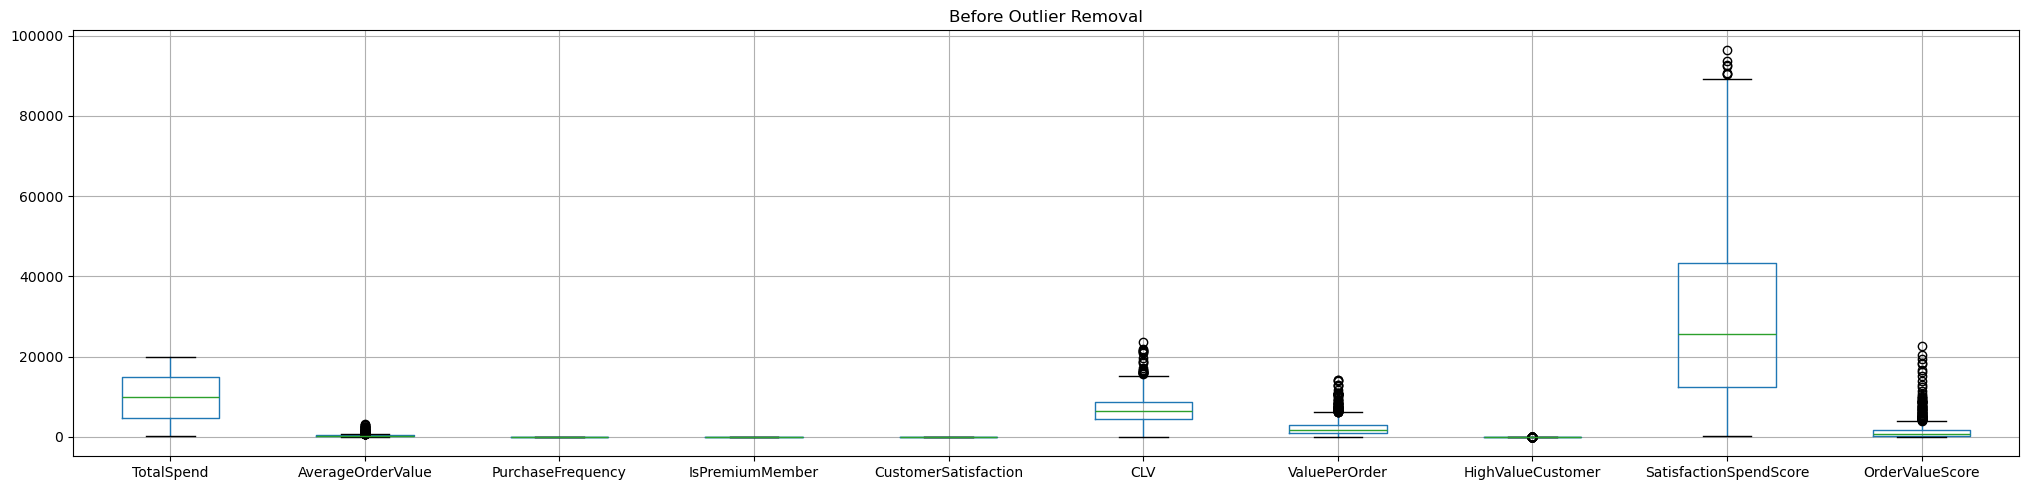

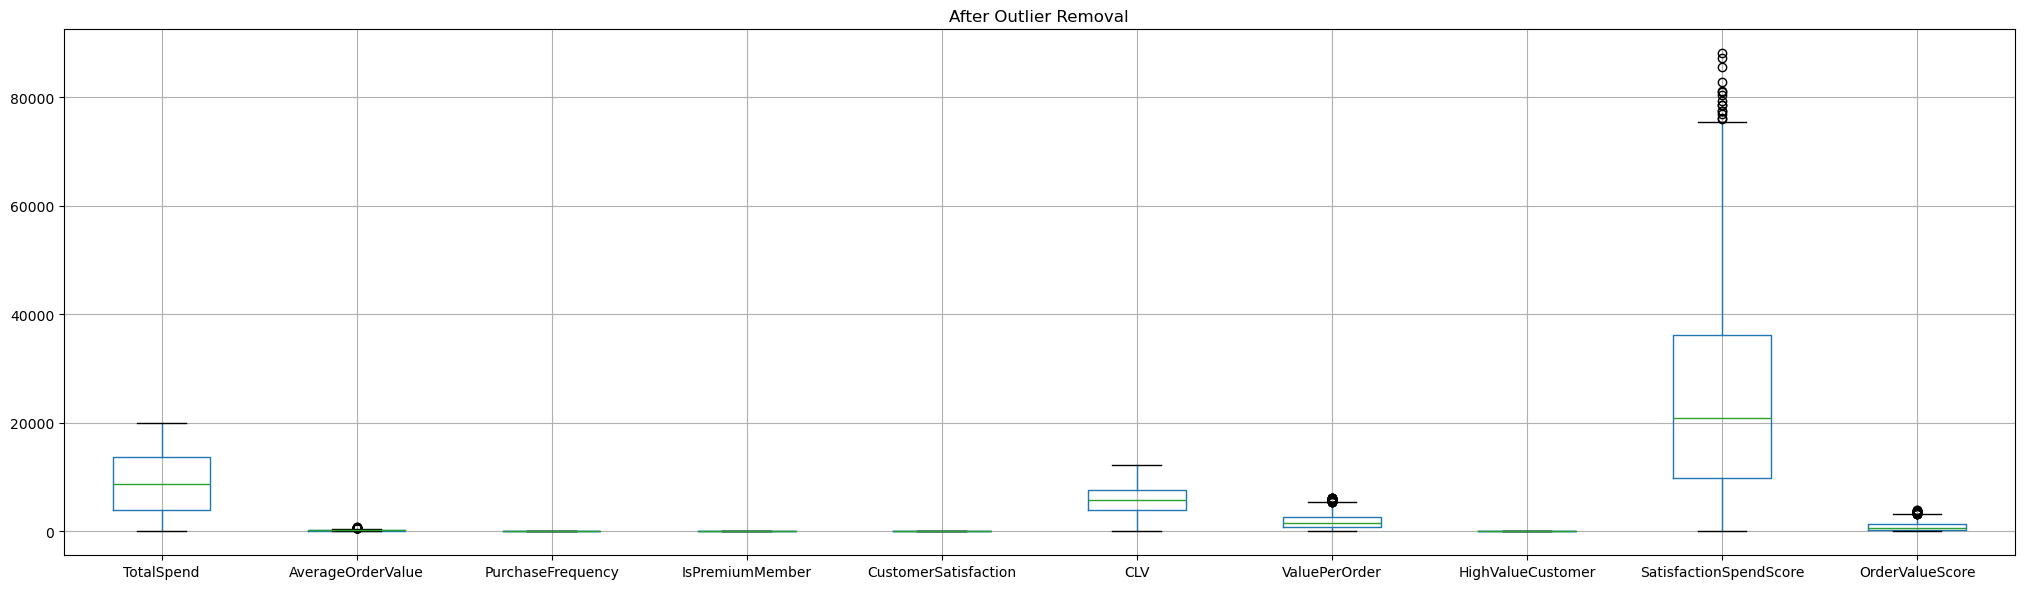

In [311]:
numeric_cols = df.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before Outlier Removal: ", df.shape)
print("After Outlier Removal: ", data_cleaned.shape)

plt.figure(figsize=(40, 5))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

### Seperate Target column

In [313]:
target_column = 'CLV'
y = data_cleaned[target_column]         
df = data_cleaned.drop(columns=[target_column, 'CustomerID'])
X = df

### Data Transformation (Standardization)

#### Before Standardization

In [316]:
df

,Gender,TotalSpend,AverageOrderValue,PurchaseFrequency,IsPremiumMember,Region,CustomerSatisfaction,ValuePerOrder,HighValueCustomer,SatisfactionSpendScore,OrderValueScore
0,Male,10072.94,107.82,9.96,1,Urban,1.54,919.063869,0,15512.3276,1073.8872
3,Female,12596.21,129.08,2.31,0,Rural,4.16,3805.501511,0,52400.2336,298.1748
5,Male,10696.38,153.22,4.76,1,Urban,2.65,1857.010417,0,28345.4070,729.3272
6,Male,14456.30,292.20,7.78,1,Urban,3.40,1646.503417,0,49151.4200,2273.3160
7,Female,2911.43,48.51,9.17,1,Urban,1.64,286.276303,0,4774.7452,444.8367
...,...,...,...,...,...,...,...,...,...,...,...
992,Female,7486.12,109.04,4.14,0,Urban,4.55,1456.443580,0,34061.8460,451.4256
993,Male,17408.29,351.74,5.86,0,Rural,3.66,2537.651603,0,63714.3414,2061.1964
994,Female,14636.88,186.49,3.22,1,Rural,3.59,3468.454976,0,52546.3992,600.4978
996,Male,15945.19,247.21,7.97,1,Urban,2.58,1777.613155,0,41138.5902,1970.2637


#### After Standardization

In [321]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [323]:
df

,Gender,TotalSpend,AverageOrderValue,PurchaseFrequency,IsPremiumMember,Region,CustomerSatisfaction,ValuePerOrder,HighValueCustomer,SatisfactionSpendScore,OrderValueScore
0,Male,0.182143,-0.535174,1.795233,1.419859,Urban,-1.191734,-0.651965,0.0,-0.505742,0.148782
3,Female,0.629477,-0.390097,-0.987449,-0.704295,Rural,1.263701,1.392978,0.0,1.423188,-0.725707
5,Male,0.292669,-0.225367,-0.096263,1.419859,Urban,-0.151454,0.012538,0.0,0.165321,-0.239653
6,Male,0.959240,0.723026,1.002260,1.419859,Urban,0.551437,-0.136599,0.0,1.253302,1.500942
7,Female,-1.087473,-0.939903,1.507871,1.419859,Urban,-1.098015,-1.100273,0.0,-1.067228,-0.560369
...,...,...,...,...,...,...,...,...,...,...,...
992,Female,-0.276457,-0.526849,-0.321788,-0.704295,Urban,1.629204,-0.271250,0.0,0.464243,-0.552941
993,Male,1.482579,1.129324,0.303861,-0.704295,Rural,0.795106,0.494749,0.0,2.014821,1.261812
994,Female,0.991254,0.001666,-0.656437,1.419859,Rural,0.729503,1.154192,0.0,1.430831,-0.384887
996,Male,1.223195,0.416016,1.071372,1.419859,Urban,-0.217057,-0.043712,0.0,0.834298,1.159300


### Categorical into Numerical (One-Hot Encoding)

#### Before One-Hot Encoding

In [327]:
df.shape

(754, 11)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  754 non-null    object 
 1   TotalSpend              754 non-null    float64
 2   AverageOrderValue       754 non-null    float64
 3   PurchaseFrequency       754 non-null    float64
 4   IsPremiumMember         754 non-null    float64
 5   Region                  754 non-null    object 
 6   CustomerSatisfaction    754 non-null    float64
 7   ValuePerOrder           754 non-null    float64
 8   HighValueCustomer       754 non-null    float64
 9   SatisfactionSpendScore  754 non-null    float64
 10  OrderValueScore         754 non-null    float64
dtypes: float64(9), object(2)
memory usage: 70.7+ KB


#### After One-Hot Encoding

In [332]:
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [334]:
df.shape

(754, 14)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalSpend              754 non-null    float64
 1   AverageOrderValue       754 non-null    float64
 2   PurchaseFrequency       754 non-null    float64
 3   IsPremiumMember         754 non-null    float64
 4   CustomerSatisfaction    754 non-null    float64
 5   ValuePerOrder           754 non-null    float64
 6   HighValueCustomer       754 non-null    float64
 7   SatisfactionSpendScore  754 non-null    float64
 8   OrderValueScore         754 non-null    float64
 9   Gender_Female           754 non-null    bool   
 10  Gender_Male             754 non-null    bool   
 11  Region_Rural            754 non-null    bool   
 12  Region_Suburban         754 non-null    bool   
 13  Region_Urban            754 non-null    bool   
dtypes: bool(5), float64(9)
memory usage: 62.6 KB


### Feature Selection

In [339]:
df_with_target = df.copy()
df_with_target['target'] = y 

correlation = df_with_target.corr()['target'].abs()
correlation = correlation.drop('target')

N = 7
top_features = correlation.sort_values(ascending=False).head(N).index
X_selected = df[top_features.tolist()]

print("Selected Features based on correlation:", top_features.tolist())

Selected Features based on correlation: ['TotalSpend', 'AverageOrderValue', 'SatisfactionSpendScore', 'OrderValueScore', 'ValuePerOrder', 'IsPremiumMember', 'PurchaseFrequency']


### Data Splitting

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [344]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((603, 7), (151, 7), (603,), (151,))

## LINEAR REGRESSION

### Display the first few values of selected features and target

### Train the model

In [349]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions

In [352]:
y_pred_test = model.predict(X_test)

### Evaluate the model

In [355]:
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred_test)
print("R² Score:", r2)

Mean Squared Error: 318959.4368884507
Root Mean Squared Error: 564.7649395000107
R² Score: 0.9501650750399655


### Feature Importance

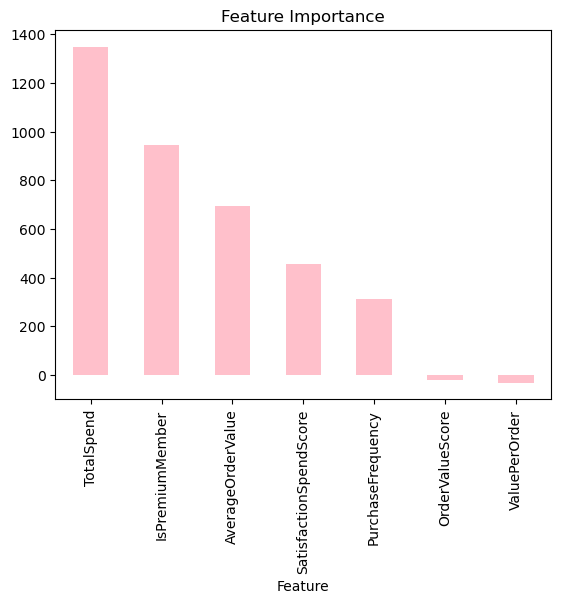

In [358]:
features = top_features 

importance = model.coef_ 
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance', color='pink')
plt.show()

### Model Performance Visualization

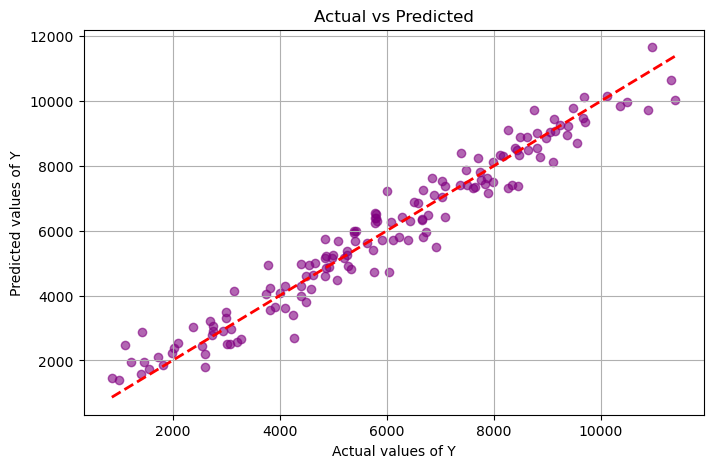

In [360]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred_test, color='purple', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 

plt.xlabel('Actual values of Y')
plt.ylabel('Predicted values of Y')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

### Assessing Error Patterns in Predictions

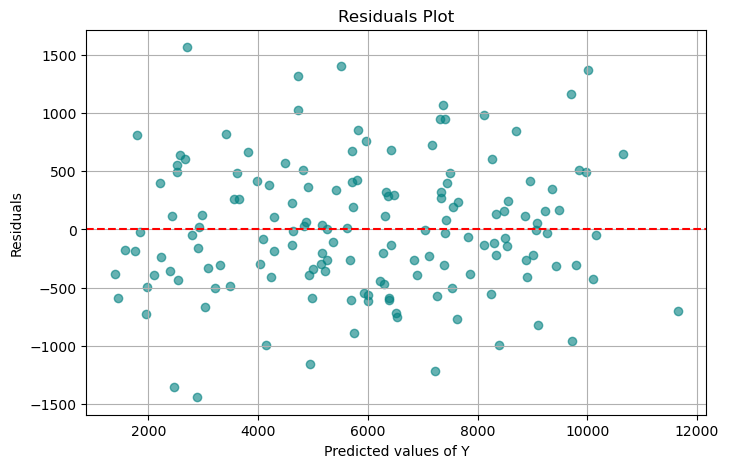

In [364]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuals, alpha=0.6, color='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values of Y')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

### Training vs Cross-Validation Performance

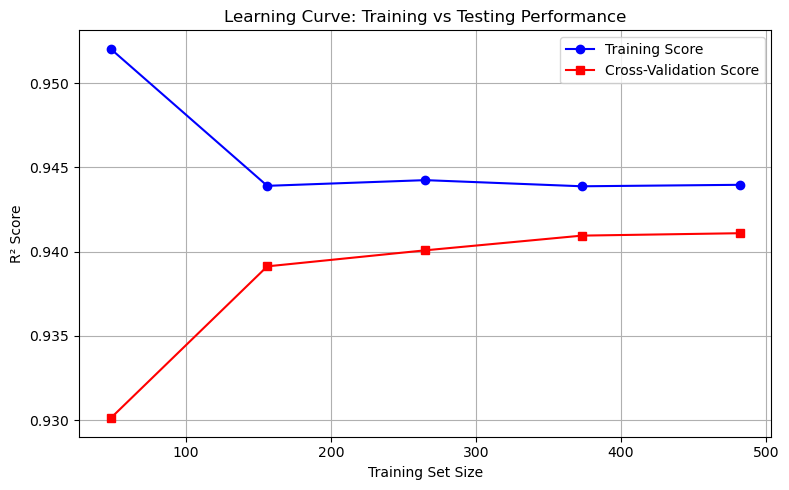

In [367]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve: Training vs Testing Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
